In [2]:
#Importing pandas library
import pandas as pd
import seaborn as sns 

# Data Preparation

In [3]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
print(ratings.shape)

(100836, 4)


In [5]:
movies=pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
print(movies.shape)

(9742, 3)


In [7]:
ratings=pd.merge(movies,ratings)
ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [8]:
print(ratings.shape)

(100836, 6)


In [9]:
#Dropping genres and timestamp attribute since they are not required for recommendation
ratings = pd.merge(movies,ratings).drop(['genres','timestamp'],axis=1)

In [10]:
ratings.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


# Data Exploration

In [11]:
#Statistical Angle
ratings.describe()

,movieId,userId,rating
count,100836.000000,100836.000000,100836.000000
mean,19435.295718,326.127564,3.501557
std,35530.987199,182.618491,1.042529
min,1.000000,1.000000,0.500000
25%,1199.000000,177.000000,3.000000
50%,2991.000000,325.000000,3.500000
75%,8122.000000,477.000000,4.000000
max,193609.000000,610.000000,5.000000


In [12]:
#Creating mean rating data
movie_ratings=pd.DataFrame(ratings.groupby('title')['rating'].mean())
movie_ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [13]:
#Creating number of rating data
movie_ratings['number_of_ratings']=ratings.groupby('title')['rating'].count()
movie_ratings

,rating,number_of_ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


# Data Visualization

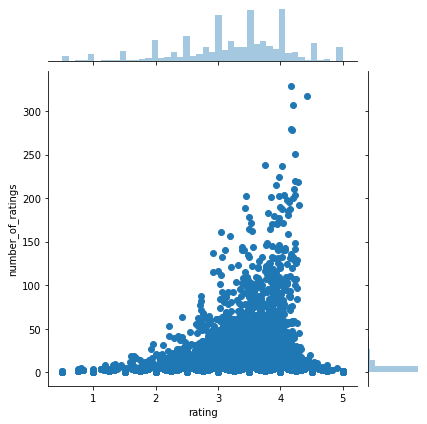

In [14]:
#Plotting the join plot
sns.jointplot(x='rating',y='number_of_ratings',data=movie_ratings)

# Creating Item-Interation matrix

In [15]:
#Creating a dataframe using the pivot method , rows=user_id, columns=title and values as ratings
user_ratings=ratings.pivot_table(index=['userId'],columns=['title'],values='rating')
user_ratings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Most rated movies
movie_ratings.sort_values('number_of_ratings',ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [17]:
#Drop movies which contains less than 10 users who have rated them and fill it
user_ratings=user_ratings.dropna(thresh=10,axis=1).fillna(0)
user_ratings.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Building recommendation 

In [18]:
#Creating an item similarity matrix using pearson correlation formula
item_similarity_df=user_ratings.corr(method='pearson')
item_similarity_df.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518


In [22]:
#Function to get recommendations
def get_similar_movies(movie_name,user_rating):
    similar_score=item_similarity_df[movie_name]*[user_rating-ratings['rating'].mean()]
    similar_score=similar_score.sort_values(ascending=False)
    
    return similar_score

In [53]:
user_movies=[("10 Cloverfield Lane (2016)",5),("127 Hours (2010)",5),("10 Things I Hate About You (1999)",4.5)]
similar_movies=pd.DataFrame()

for movie,rating in user_movies:
    similar_movies=similar_movies.append(get_similar_movies(movie,rating),ignore_index=True)
similar_movies.head()

,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
0,-0.035616,0.213485,1.498443,-0.008689,0.168419,0.009199,-0.025227,0.047506,-0.036375,0.408989,...,0.363616,0.148435,-0.035180,0.408097,0.362250,0.292277,0.478559,0.266492,0.144806,0.004095
1,0.012483,0.299891,0.408989,0.065006,0.133853,0.044903,-0.069343,0.088202,0.374507,1.498443,...,0.334355,0.231209,0.019341,0.546693,0.298079,0.136981,0.338269,0.192756,0.229763,0.004363
2,0.143258,0.273563,-0.005790,0.998443,0.244289,0.223133,0.211143,0.011766,0.091820,0.043315,...,0.242739,0.104695,0.132254,0.091710,0.158390,0.281495,0.049954,0.120840,0.130609,0.110440


In [54]:
similar_movies.sum().sort_values(ascending=False).head(5)

127 Hours (2010)              1.950747
10 Cloverfield Lane (2016)    1.901642
The Hateful Eight (2015)      1.389844
Warm Bodies (2013)            1.361463
Moonrise Kingdom (2012)       1.344219
dtype: float64

In [23]:
#Without subtracting user_mean ratings 
print(get_similar_movies("Matrix, The (1999)",1))

title
Disclosure (1994)                                        0.456536
Firm, The (1993)                                         0.357375
Crimson Tide (1995)                                      0.343195
Clear and Present Danger (1994)                          0.324586
Forget Paris (1995)                                      0.320858
                                                           ...   
Sixth Sense, The (1999)                                 -1.192092
Saving Private Ryan (1998)                              -1.272382
Star Wars: Episode V - The Empire Strikes Back (1980)   -1.307400
Fight Club (1999)                                       -1.346374
Matrix, The (1999)                                      -2.501557
Name: Matrix, The (1999), Length: 2269, dtype: float64
